0,甘口牛肉咖喱
1,辛口牛肉咖喱
2,甘口豬排咖哩
3,辛口豬排咖哩
4,甘口雞肉咖哩
5,辛口雞肉咖哩
6,甘口可樂餅咖哩
7,辛口可樂餅咖哩
----- maindish_count ------
[187, 158, 176, 147]


<Figure size 432x288 with 0 Axes>

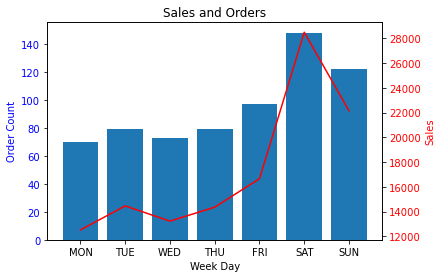

In [9]:
from pptx import Presentation
import matplotlib.pyplot as plt
from pptx.util import Inches 
import pandas as pd
from imp import reload
import sys
reload(sys)
#開啟新的簡報物件
prs = Presentation()
#建立簡報檔第一張頁面物件
title_slide_layout = prs.slide_layouts[0] 
#增加一張簡報
slide = prs.slides.add_slide(title_slide_layout)
#設定第一張簡報的標題 
title = slide.shapes.title
title.text = "餐廳銷售量週報"
#設定第一張簡報的副標題
subtitle = slide.placeholders[1]
subtitle.text = "作者：Meiko 2020/10/01"
#將簡報物件存檔

pdCurryInfo=pd.read_excel("currySalesAndServiceInfo_Total.xlsx",sheet_name="Sheet1")


def add_slide(prs, layout, title,img,text1,text2,text3):
	slide = prs.slides.add_slide(layout)
	shapes = slide.shapes
	
    #投影片標題
	title_shape = shapes.title
	title_shape.text = text1

	#投影片內第一大點
	body_shape = shapes.placeholders[1]
	tf = body_shape.text_frame
	tf.text = text2

    #投影片內第二階層小點
	p = tf.add_paragraph()
	p.text = text3
	p.level = 1


	# show the figure
	left = Inches(3)
	height = Inches(4.5)
	left = top = Inches(3)
	pic = slide.shapes.add_picture(img, left, top, height=height)


	
	return slide


#============= 大綱頁 ==========
text1="大綱"
title_slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(title_slide_layout)
shapes = slide.shapes
title_shape = shapes.title
title_shape.text = text1

#投影片內第一大點
paragraph_strs = [
    '一週銷售長方圖',
    '一週主餐圓餅圖',
    '一週銷售量與訂單關係',
    '臨時動議'
]


body_shape = shapes.placeholders[1]
tf = body_shape.text_frame
tf.clear()

p = tf.paragraphs[0]
p.text = paragraph_strs[0]

for para_str in paragraph_strs[1:]:
    p = tf.add_paragraph()
    p.text = para_str
#============= 內頁第一頁開始 ===========

eachDay=pdCurryInfo.groupby('dayTime')
eachDay.size()


weekNameList=['MON','TUE','WED','THU','FRI','SAT','SUN' ]
order_num_list=list()
for i in range(len(weekNameList)):
  weekName=weekNameList[i]
  order_num=len(eachDay.get_group(weekName))
  order_num_list.append(order_num)

weekNameList=['MON','TUE','WED','THU','FRI','SAT','SUN' ]
plt.bar(weekNameList,order_num_list)
plt.title("Week Sales")
plt.xlabel('Week Day')
plt.ylabel('Order Count')
plt.savefig('bar_graph.jpg')

img_bar="bar_graph.jpg"


text1='一週銷售長方圖'
text2='該週的銷售量分佈'
text3='分別列出週一～週日每天的訂單數量'

title_slide_layout = prs.slide_layouts[1]
slide = add_slide(prs, title_slide_layout,title ,img_bar,text1,text2,text3)

#============= 內頁第二頁開始 ===========

maindish=pdCurryInfo.groupby('content')
maindish.size()
content_type=['牛肉咖喱','豬排咖哩','雞肉咖哩','可樂餅咖哩']
content_total=['甘口牛肉咖喱','辛口牛肉咖喱','甘口豬排咖哩','辛口豬排咖哩','甘口雞肉咖哩','辛口雞肉咖哩','甘口可樂餅咖哩','辛口可樂餅咖哩']
maindish_count_list=list()
beef=0
pork=0
chicken=0
croquette=0

#新增計算
contentList=list()
maindish_list=list()
localDic={}
localDic['beef']=0
localDic['pork']=0
localDic['chicken']=0
localDic['croquette']=0
for i in range(len(content_total)):
  content=content_total[i]
  stuff = content
  print("%d,%s"%(i,stuff))
  maindish_count=len(maindish.get_group(stuff))
  maindish_count_list.append(maindish_count)
  if '牛肉' in stuff:
  	localDic['beef']+=maindish_count
  elif '豬排' in stuff:
  	localDic['pork']+=maindish_count
  elif '雞肉' in stuff:
  	localDic['chicken']+=maindish_count
  elif '可樂餅' in stuff:
  	localDic['croquette']+=maindish_count

maindish_list.append(localDic['beef'])
maindish_list.append(localDic['pork'])
maindish_list.append(localDic['chicken'])
maindish_list.append(localDic['croquette'])

print ("----- maindish_count ------")
print (maindish_list)

labels = ['beef','pork','chicken','croquette']      # 製作圓餅圖的類別標籤
plt.clf() 
plt.pie(maindish_list,                  # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.5,              # 數字距圓心的距離
        textprops = {"fontsize" : 16},  # 文字大小
        shadow=True)                    # 設定陰影

 
plt.axis('equal')     # 使圓餅圖比例相等
plt.title("Pie chart of curry sales", {"fontsize" : 18})  # 設定標題及其文字大小
plt.savefig('pie_graph.jpg')

img_pie="pie_graph.jpg"


text1='一週主餐圓餅圖'
text2='該週的圓餅圖分佈'
text3='列出牛肉、豬排、雞肉、可樂餅咖哩的比率'

title_slide_layout = prs.slide_layouts[1]
slide = add_slide(prs, title_slide_layout,title ,img_pie,text1,text2,text3)


#============= 內頁第三頁開始 ===========


weekSales=list()
for i in range(len(weekNameList)):
  weekName=weekNameList[i]
  weekSale=pdCurryInfo[pdCurryInfo['dayTime']==weekName].price.sum()
  weekSales.append(weekSale)


plt.clf() 
#設定資料
data1 = order_num_list
data2 = weekSales
t = weekNameList


#Plot graph with 2 y axes
fig, ax1 = plt.subplots()

#畫出訂單數長方圖
ax1.bar(t, data1)
ax1.set_xlabel('Week Day')

# 將資料 1 設定成藍色
ax1.set_ylabel('Order Count', color='b')
[tl.set_color('b') for tl in ax1.get_yticklabels()]

#利用.twinx()在右方畫出 sales  的 y 軸，並劃出銷售額折線圖
ax2 = ax1.twinx()
#Plot a line
ax2.plot(t, data2, 'r-')

# 將資料 2 設定成紅色
ax2.set_ylabel('Sales', color='r')
[tl.set_color('r') for tl in ax2.get_yticklabels()]

plt.title('Sales and Orders')



plt.savefig('twinx_graph.jpg')

img_twinx="twinx_graph.jpg"


text1='一週銷售量與訂單關係'
text2='藍色為訂單數、紅色為銷售量'
text3='可以看出訂單數與銷售量有正比關係'

title_slide_layout = prs.slide_layouts[1]
slide = add_slide(prs, title_slide_layout,title ,img_twinx,text1,text2,text3)


#============= 討論頁 ===========

text1="臨時動議"
title_slide_layout = prs.slide_layouts[1]
slide = prs.slides.add_slide(title_slide_layout)
shapes = slide.shapes
title_shape = shapes.title
title_shape.text = text1



body_shape = shapes.placeholders[1]
tf = body_shape.text_frame
tf.clear()

p = tf.paragraphs[0]
p.text = "討論"


#產生頭影片
prs.save("python_ppt_output.pptx")